In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import requests

In [3]:
from citipy import citipy

In [4]:
from config import weather_api_key

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | alyangula
Processing Record 6 of Set 1 | kandrian
Processing Record 7 of Set 1 | egvekinot
Processing Record 8 of Set 1 | matara
Processing Record 9 of Set 1 | verkhoyansk
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | udachnyy
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | san matias
Processing Record 21 of Set 1 | bambous virieux
Processing Record 2

Processing Record 38 of Set 4 | santa rosa
Processing Record 39 of Set 4 | biarritz
Processing Record 40 of Set 4 | kapaa
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | mabaruma
Processing Record 43 of Set 4 | whitianga
Processing Record 44 of Set 4 | owo
Processing Record 45 of Set 4 | lihula
Processing Record 46 of Set 4 | mrirt
City not found. Skipping...
Processing Record 47 of Set 4 | clyde river
Processing Record 48 of Set 4 | salinopolis
Processing Record 49 of Set 4 | oksfjord
Processing Record 50 of Set 4 | stendal
Processing Record 1 of Set 5 | lujan
Processing Record 2 of Set 5 | lanigan
Processing Record 3 of Set 5 | nisia floresta
Processing Record 4 of Set 5 | palimbang
Processing Record 5 of Set 5 | yambio
Processing Record 6 of Set 5 | solsvik
City not found. Skipping...
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 5 | deming
Processing Record 9 of Set 5 | sorgun
Processing Record 10 of Set 5 | cairns
Processing Record

Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | eyl
Processing Record 32 of Set 8 | rajura
Processing Record 33 of Set 8 | saint george
Processing Record 34 of Set 8 | andreiasu de jos
Processing Record 35 of Set 8 | senno
Processing Record 36 of Set 8 | san patricio
Processing Record 37 of Set 8 | nola
Processing Record 38 of Set 8 | nampula
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | namikupa
Processing Record 41 of Set 8 | vostok
Processing Record 42 of Set 8 | umba
Processing Record 43 of Set 8 | kulhudhuffushi
Processing Record 44 of Set 8 | san quintin
Processing Record 45 of Set 8 | bilma
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | nigran
Processing Record 48 of Set 8 | shaunavon
Processing Record 49 of Set 8 | dongsheng
Processing Record 50 of Set 8 | mechanicsville
Processing Record 1 of Set 9 | derzhavinsk
Processing Record 2 of Set 9 | siva
Processing Record 3 of Set 9 | kendari
Processing Reco

Processing Record 19 of Set 12 | kruisfontein
Processing Record 20 of Set 12 | ribas do rio pardo
Processing Record 21 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 22 of Set 12 | verkhniy avzyan
Processing Record 23 of Set 12 | gore
Processing Record 24 of Set 12 | storslett
Processing Record 25 of Set 12 | ituni
City not found. Skipping...
Processing Record 26 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 27 of Set 12 | dayong
Processing Record 28 of Set 12 | maravilha
Processing Record 29 of Set 12 | puerto madero
Processing Record 30 of Set 12 | austin
Processing Record 31 of Set 12 | atar
Processing Record 32 of Set 12 | chiang rai
Processing Record 33 of Set 12 | faya
Processing Record 34 of Set 12 | daxian
City not found. Skipping...
Processing Record 35 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 36 of Set 12 | vakhtan
Processing Record 37 of Set 12 | machachi
Processing Record 38 of Set 12 | diego de almagr

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,86.00,62,40,11.41,US,2020-11-04 01:12:56
1,Namibe,-15.20,12.15,68.54,68,0,9.89,AO,2020-11-04 01:12:56
2,Upernavik,72.79,-56.15,16.90,93,100,6.26,GL,2020-11-04 01:12:56
3,Alyangula,-13.85,136.42,86.00,70,40,6.93,AU,2020-11-04 01:12:56
4,Kandrian,-6.22,149.55,83.12,81,89,8.59,PG,2020-11-04 01:12:56
5,Egvekinot,66.32,-179.17,7.70,81,0,3.76,RU,2020-11-04 01:12:56
6,Matara,5.95,80.54,77.14,87,8,5.01,LK,2020-11-04 01:12:57
7,Verkhoyansk,67.54,133.38,-13.83,84,5,1.81,RU,2020-11-04 01:12:57
8,Port Alfred,-33.59,26.89,66.65,92,91,5.19,ZA,2020-11-04 01:12:57
9,Kavieng,-2.57,150.80,85.48,71,100,6.76,PG,2020-11-04 01:12:57


In [13]:
new_city_data = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
new_city_data

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [14]:
city_data_df = city_data_df[new_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2020-11-04 01:12:56,19.73,-155.09,86.00,62,40,11.41
1,Namibe,AO,2020-11-04 01:12:56,-15.20,12.15,68.54,68,0,9.89
2,Upernavik,GL,2020-11-04 01:12:56,72.79,-56.15,16.90,93,100,6.26
3,Alyangula,AU,2020-11-04 01:12:56,-13.85,136.42,86.00,70,40,6.93
4,Kandrian,PG,2020-11-04 01:12:56,-6.22,149.55,83.12,81,89,8.59
5,Egvekinot,RU,2020-11-04 01:12:56,66.32,-179.17,7.70,81,0,3.76
6,Matara,LK,2020-11-04 01:12:57,5.95,80.54,77.14,87,8,5.01
7,Verkhoyansk,RU,2020-11-04 01:12:57,67.54,133.38,-13.83,84,5,1.81
8,Port Alfred,ZA,2020-11-04 01:12:57,-33.59,26.89,66.65,92,91,5.19
9,Kavieng,PG,2020-11-04 01:12:57,-2.57,150.80,85.48,71,100,6.76


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
import time

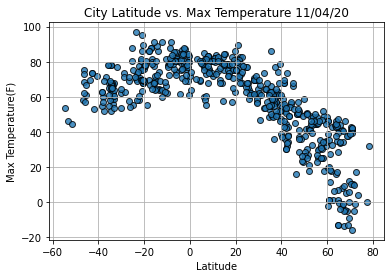

In [23]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
#Incoroporate other graph properties
plt.title('City Latitude vs. Max Temperature '+time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()


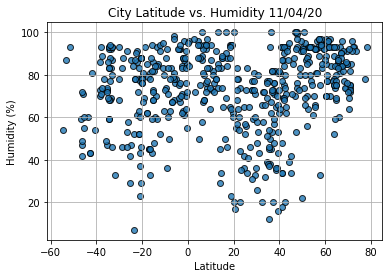

In [24]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
#Incoroporate other graph properties
plt.title('City Latitude vs. Humidity '+time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

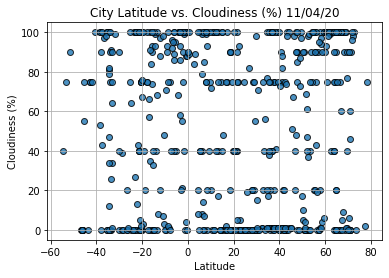

In [25]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
#Incoroporate other graph properties
plt.title('City Latitude vs. Cloudiness (%) '+time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

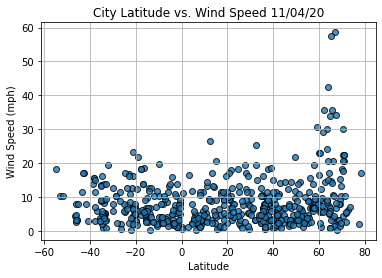

In [26]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
#Incoroporate other graph properties
plt.title('City Latitude vs. Wind Speed '+time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [28]:
from scipy.stats import linregress

In [49]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

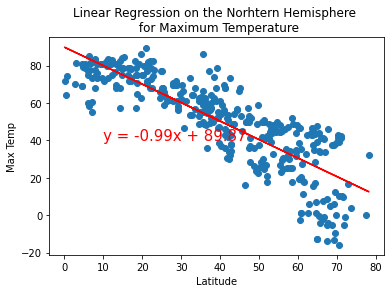

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Norhtern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))


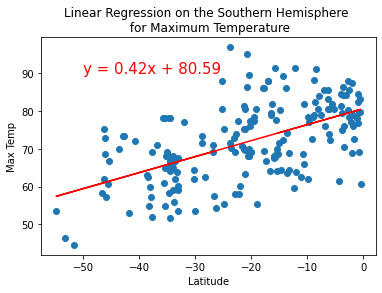

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

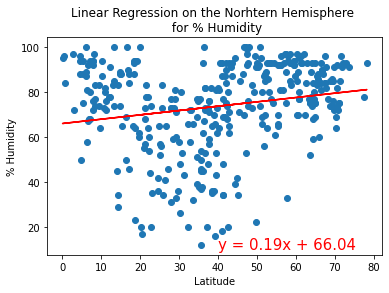

In [57]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Norhtern Hemisphere \n for % Humidity', '% Humidity', (40,10))

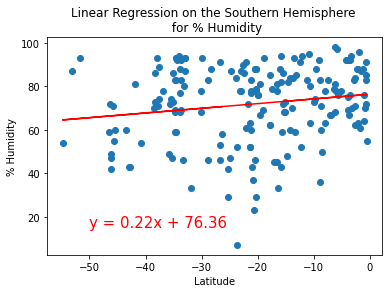

In [58]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

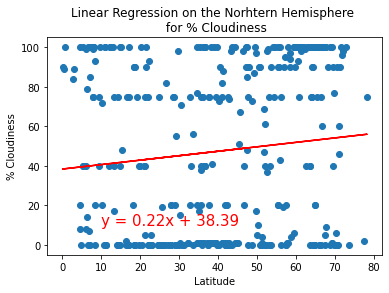

In [65]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Norhtern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,10))

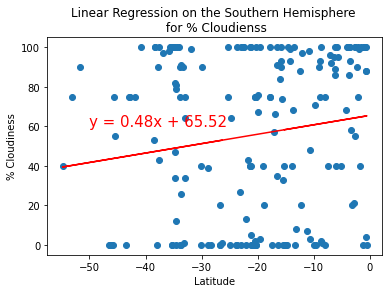

In [60]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudienss', '% Cloudiness',(-50,60))

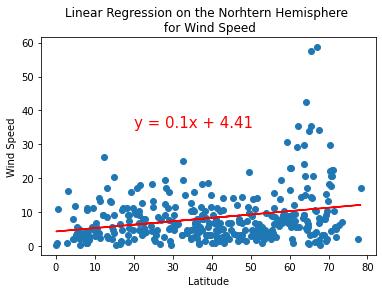

In [69]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Norhtern Hemisphere \n for Wind Speed', 'Wind Speed', (20,35))

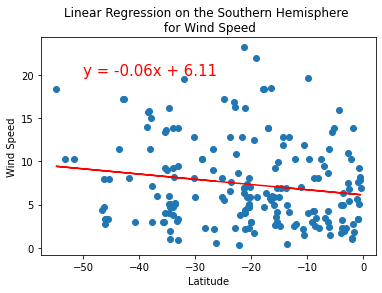

In [73]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))